# **SVM from Scratch**

## **About SVM (General required for algo)**

* For all xi in training Data:  

```
 -> xi.w + b <= -1   if yi = -1 (belongs to -ve class)  
 -> xi.w + b >= +1	if yi = +1 (belongs to +ve class)  
 			or  
  	__yi(xi.w+b) >= 1__

```

* For all support vectors(SV) (data points which decides margin)

```
  xi.w+b = -1    here xi is -ve SV and yi is -1
  xi.w+b = +1    here xi is +ve SV and yi is +1
```


* For decision Boundary ```yi(xi.w+b)=0``` here xi belongs to point in decision boundary  
* Our Objective is to maximize Width W

        W = ((X+ - X-).w)/|w|
        or we can say minimize |w| 


         
* Once we have found optimized w and b using algorithm  
       1. x.w+b = 1 is line passing through +ve support vectors    
       2. x.w+b = -1 is line passing through -ve support vectors
       3. x.w+b = 0 is decision boundary 



* It is not necessary that support vector lines always pass through support vectors  
* It is a Convex Optimization problem and will always lead to a global minimum  
* This is Linear SVM means kernel is linear

In [ ]:
#Import important libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters                      # Inializing Parameters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)                   
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1                    # Gradient Descent
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b                      # Cost Function
        return np.sign(approx)

In [ ]:
# Laoding dataset
X, y =  datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

# Calling methods of class SVM and calculating eights and bais
clf = SVM()
clf.fit(X, y)           
 
print(clf.w, clf.b)

[0.58977016 0.17946483] -0.1520000000000001


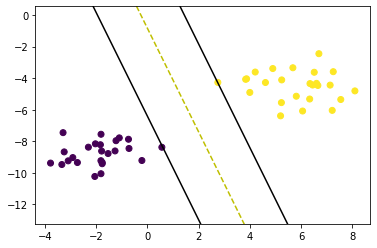

In [ ]:
# Visiualising our Data
def visualize_svm():
     def get_hyperplane_value(x, w, b, offset):
          return (-w[0] * x + b + offset) / w[1]

     fig = plt.figure()
     ax = fig.add_subplot(1,1,1)
     plt.scatter(X[:,0], X[:,1], marker='o',c=y)

     x0_1 = np.amin(X[:,0])
     x0_2 = np.amax(X[:,0])

     x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
     x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

     x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
     x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

     x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
     x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

     ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
     ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
     ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

     x1_min = np.amin(X[:,1])
     x1_max = np.amax(X[:,1])
     ax.set_ylim([x1_min-3,x1_max+3])

     plt.show()

visualize_svm()